# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below to import the dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [5]:
df["quality rating"].value_counts().sort_index()

quality rating
1     10090
2     10030
3      9838
4      9928
5     10124
6      9961
7      9954
8      9977
9      9955
10    10143
Name: count, dtype: int64

<Axes: xlabel='quality rating'>

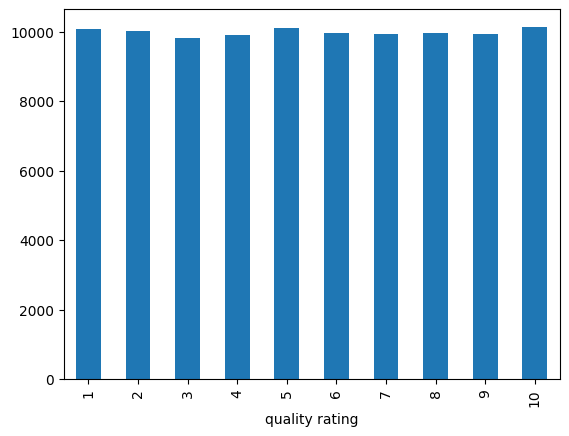

In [6]:
df["quality rating"].value_counts().sort_index().plot.bar()


❓ Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [7]:
y = (df["quality rating"] >= 6).astype(int)
y.value_counts()

quality rating
0    50010
1    49990
Name: count, dtype: int64

❓ Check the class balance of the new binary target

In [8]:
y.value_counts(normalize=True)


quality rating
0    0.5001
1    0.4999
Name: proportion, dtype: float64

❓ Create your `X` by normalising the features. This will allow for fair comparison of different solvers.

In [10]:
from sklearn.preprocessing import StandardScaler

X= df.drop(columns=["quality rating"])
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[-0.78860255, -1.52846058, -1.7331803 , ..., -0.47838741,
         0.34023114, -0.48983293],
       [-0.34686003, -0.46206949, -0.15828964, ..., -0.98697188,
        -0.76942881, -0.48983293],
       [ 0.06441748,  0.23275676,  0.55041116, ...,  1.24681087,
         1.33992478, -0.30738714],
       ...,
       [-0.20976753,  0.33307927,  1.14099516, ..., -0.1393311 ,
         0.04032304, -0.58807298],
       [-2.47941011, -2.27902156, -1.94972776, ...,  0.20969745,
        -1.67915003, -0.04073559],
       [ 2.06749131,  0.55973382, -0.84074225, ...,  0.96758803,
        -0.65946251,  0.14872736]])

## 2. LogisticRegression solvers

❓ Logistic Regression models can be optimized using different **solvers**. Make a comparison of the available solvers':
- Fit time - which solver is **the fastest**?
- Precision - **how different** are their respective precision scores?

Available solvers for Logistic Regression are `['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this Stack Overflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from time import time

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
results = []

for solver in solvers :
    model = LogisticRegression( solver= solver, max_iter = 1000)

    start = time()
    model.fit(X_scaled, y)
    fit_time = time() - start

    y_pred = model.predict(X_scaled)
    precision = precision_score(y, y_pred)

    results.append((solver, fit_time, precision))

results


[('newton-cg', 0.20279479026794434, 0.8738248084489543),
 ('lbfgs', 0.06164097785949707, 0.8738686494211213),
 ('liblinear', 0.11002397537231445, 0.873891972496065),
 ('sag', 0.4769279956817627, 0.873891972496065),
 ('saga', 0.7847678661346436, 0.873891972496065)]

In [16]:
import pandas as pd

df_results = pd.DataFrame(results, columns=["solver", "fit_time", "precision"])
df_results.sort_values("fit_time")


,solver,fit_time,precision
1,lbfgs,0.061641,0.873869
2,liblinear,0.110024,0.873892
0,newton-cg,0.202795,0.873825
3,sag,0.476928,0.873892
4,saga,0.784768,0.873892


In [17]:
# YOUR ANSWER
fastest_solver = "lbfgs"

<details>
    <summary>ℹ️ Click here for our interpretation</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function.

**The wine dataset**
    
If you check feature importance with sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">permutation_importance</a> on the current dataset, you'll see many features result in almost 0 importance. Liblinear solver successively moves only along *one* direction at a time, regularizing the others with L1 regularization (a.k.a, setting their beta to 0), which might provide a good fit for a dataset where many features are not that important in predicting the target.

❗️There is a cost to searching for the best solver. Sticking with the default (`lbfgs`) may save the most time overall, sklearn provides you this grid for an idea of which solver to choose to start off with: 

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers-chart.png" width=700>



</details> 

###  🧪 Test your code

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'solvers',
    fastest_solver=fastest_solver
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/04-Under-the-hood/data-solvers/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_solvers.py::TestSolvers::test_fastest_solver PASSED                 [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master



## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

❓ Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from time import time

sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)

start = time()
sgd_model.fit(X_scaled, y)
fit_time_sgd = time() - start

y_pred_sgd = sgd_model.predict(X_scaled)
precision_sgd = precision_score(y, y_pred_sgd)

fit_time_sgd, precision_sgd


(0.146881103515625, 0.86497735340923)

☝️ The SGD model should have one of the shortest times (maybe even shorter than `liblinear`), for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single row as opposed to loading 100k rows into memory at a time.

## 4. Predictions

❓ Use the best model (balanced with short fit time and high precision) to predict the binary quality (0 or 1) of the following wine. Store your:
- `predicted_class`
- `predicted_proba_of_class` (i.e if your model predicted a class of 1 what is the probability it believes 1 to be the class should be between 0 and 1)

In [21]:
new_wine = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_new_wine.csv')
new_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [29]:
# 2. Scale it using the same scaler as before
new_wine_scaled = scaler.transform(new_wine)
new_wine_scaled

model_lbfgs = LogisticRegression(solver="lbfgs", max_iter=1000).fit(X_scaled, y)

# 3. Predict class
predicted_class = model_lbfgs.predict(new_wine_scaled)[0]

# 4. Predict probability of class
predicted_proba_of_class = model_lbfgs.predict_proba(new_wine_scaled)[0][predicted_class]


predicted_class


0

In [28]:
predicted_proba_of_class

0.9686233963189638

# 🏁  Check your code and push your notebook

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/04-Under-the-hood/data-solvers/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master

